In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

sns.set()

In [2]:
titanic = pd.read_csv("train.csv")
gender = pd.read_csv("gender_submission.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#titanic.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
#titanic.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
m = titanic.Age.isnull()
titanic[m]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


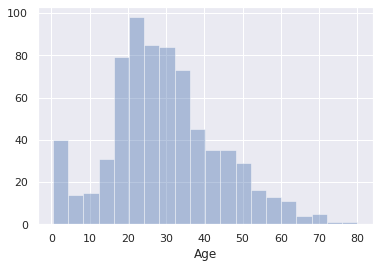

In [8]:
sns.distplot(titanic.Age, norm_hist=False, kde=False)

In [9]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [10]:
titanic.Fare.std()

49.6934285971809

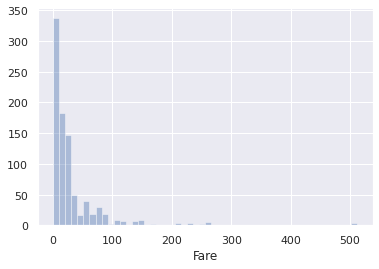

In [11]:
sns.distplot(titanic.Fare, norm_hist=False, kde=False)

[Text(0, 0.5, 'Survival mean')]

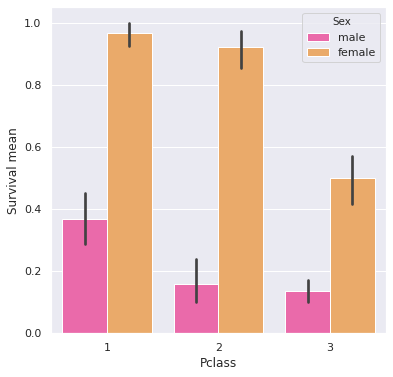

In [12]:
survived_count = titanic.Survived[titanic.Survived == 1].count()
dead_count = titanic.Survived[titanic.Survived == 0].count()

fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("pastel")
bp = sns.barplot(x="Pclass", y="Survived", data=titanic, color="b", hue="Sex", palette="spring")
ax.set(ylabel="Survival mean")
#plt.ylim(top=len(titanic.index))

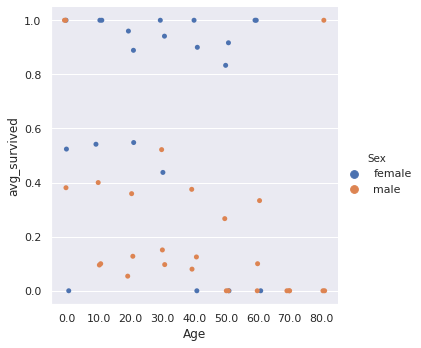

In [13]:
#ageclass = pd.cut(titanic.Age, bins=4, precision=0)
titanic["Age"] = titanic.Age // 10 * 10
#pt = titanic.pivot_table("Survived", index=["Sex", ageclass], columns=["Pclass"])
pt = titanic.pivot_table("Survived", index=["Sex", "Age"], columns=["Pclass"])
#ix = pt.index.to_frame(index=False)
#pt.reset_index(level=0, inplace=True)

#pt = pd.merge(ix, pt, left_on="Age", right_on="Age", left_index=False, right_index=False)
pt_t = pt.T.fillna(0).reset_index().melt(id_vars="Pclass", value_name="avg_survived")
#pt_t
sns.catplot(data=pt_t, x="Age", y="avg_survived", hue="Sex")

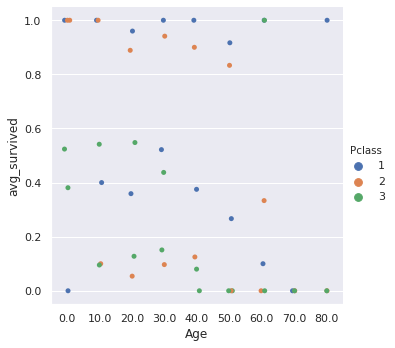

In [14]:
sns.catplot(data=pt_t, x="Age", y="avg_survived", hue="Pclass")

In [15]:
titanic_labels = titanic.Survived
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_ix, test_ix in split.split(titanic, titanic["Pclass"]):
    strat_train = titanic.loc[train_ix]
    strat_train_labels = titanic.Survived[train_ix]
    strat_train.drop("Survived", axis=1, inplace=True)
    
    strat_test = titanic.loc[test_ix]
    strat_test.drop("Survived", axis=1, inplace=True)
    strat_test_labels = titanic.Survived[test_ix]

In [16]:
cat_pipeline = make_pipeline(OneHotEncoder())
age_pipeline = make_pipeline(SimpleImputer(strategy="mean"))
fare_pipeline = make_pipeline(SimpleImputer(strategy="mean"))

#pipeline.fit(strat_train, strat_train_labels)
#attrs = ["Sex", "Age", "Pclass"]
#drop = ["Fare", "Age"]
cat_attrs = ["Sex"]
age_attr = ["Age"]
fare_attr = ["Fare"]

full_pipeline = ColumnTransformer([
    ("pass unprocessed", "passthrough", ["Pclass"]),
    ("cat pipeline", cat_pipeline, cat_attrs),
    ("age pipeline", age_pipeline, age_attr),
    ("fare pipeline", fare_pipeline, fare_attr)
], remainder="drop")

strat_train_prep = full_pipeline.fit_transform(strat_train, strat_train_labels)

In [17]:
linreg = LinearRegression()
sgd_clf = SGDClassifier(random_state=42)
rnd_forest = RandomForestClassifier(random_state=42)
#mse = cross_val_score(sgd_clf, strat_train_prep, strat_train_labels, scoring="neg_mean_squared_error", cv=15)
acc = cross_val_score(sgd_clf, strat_train_prep, strat_train_labels, scoring="accuracy", cv=15)

#np.sqrt(-mse)
acc

array([0.62962963, 0.75925926, 0.77777778, 0.62962963, 0.7962963 ,
       0.85185185, 0.62264151, 0.8490566 , 0.66037736, 0.83018868,
       0.62264151, 0.66037736, 0.66037736, 0.39622642, 0.56603774])

In [18]:
acc = cross_val_score(rnd_forest, strat_train_prep, strat_train_labels, scoring="accuracy", cv=15)

acc

array([0.83333333, 0.7037037 , 0.90740741, 0.83333333, 0.85185185,
       0.83333333, 0.8490566 , 0.75471698, 0.81132075, 0.75471698,
       0.81132075, 0.67924528, 0.81132075, 0.8490566 , 0.81132075])

In [19]:
grid = [
    {"n_estimators" : [2, 5], "max_features" : [2, 3, 4]},
    {"bootstrap" : [False], "n_estimators" : [2, 5], "max_features" : [2, 3, 4]}
]

grid_search = GridSearchCV(rnd_forest, grid, cv = 15, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(strat_train_prep, strat_train_labels)

best_rnd_forest = grid_search.best_estimator_
strat_test_prep = full_pipeline.fit_transform(strat_test)
pred = best_rnd_forest.predict(strat_test_prep)
mse = mean_squared_error(strat_test_labels, pred)
np.sqrt(mse)

0.4346134936801766

In [20]:
test = pd.read_csv("test.csv")
test_prep = full_pipeline.fit_transform(test)
titanic_prep = full_pipeline.fit_transform(titanic)

#sgd_clf.fit(titanic_prep, titanic_labels)
#survival_pred = sgd_clf.predict(test_prep)

survival_pred = best_rnd_forest.predict(test_prep)

survival_pred = pd.DataFrame(survival_pred, columns=["Survived"])

id_survival = pd.concat([test.PassengerId, survival_pred], axis=1)
id_survival.set_index("PassengerId", inplace=True)
id_survival.to_csv("predicition.csv")
id_survival

,Survived
PassengerId,
892,1
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
